In [5]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.naive_bayes import MultinomialNB



In [7]:
# This block examines the alpha hyperparameter, which is the amount of laplace smoothing
# Load data
df = pd.read_pickle("untracked_data/data_prepro_train_01.pkl")

# Define 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Range of alpha values to test (logarithmic scale)
alphas = np.logspace(-3, 1, 10)

results = []

for a in alphas:
    model = make_pipeline(CountVectorizer(), MultinomialNB(alpha=a, force_alpha=True))
    print("PARAMS: ", model.get_params)
    scores = cross_val_score(model, df['text'], df['label'], cv=kf, scoring='accuracy')
    results.append({"alpha": a, "mean_accuracy": scores.mean()})

# Convert results to DataFrame
df_results = pd.DataFrame(results)




PARAMS:  <bound method Pipeline.get_params of Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB(alpha=0.001))])>
PARAMS:  <bound method Pipeline.get_params of Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB(alpha=0.0027825594022071257))])>
PARAMS:  <bound method Pipeline.get_params of Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB(alpha=0.007742636826811269))])>
PARAMS:  <bound method Pipeline.get_params of Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB(alpha=0.021544346900318832))])>
PARAMS:  <bound method Pipeline.get_params of Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB(alpha=0.05994842503189409))])>
PARAMS:  <bound method Pipeline.get_params of Pipeline(steps=[('countvectorizer', CountVectorizer()),
   

NameError: name 'plt' is not defined

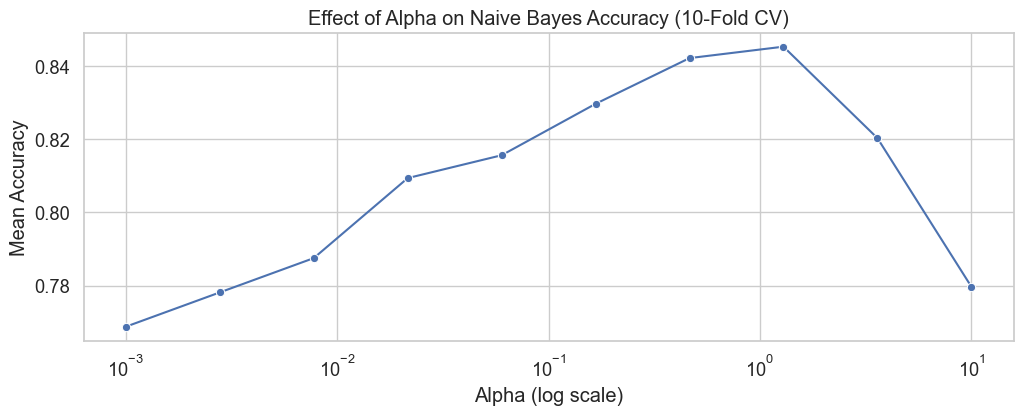

In [11]:
# Create Seaborn lineplot
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid", font_scale=1.2)
fig, ax = plt.subplots(figsize=(12, 4))  # Set your desired figure size in inches
sns.lineplot(
    data=df_results,
    x="alpha",
    y="mean_accuracy",
    marker="o"
)

# Customize plot
ax.set_xscale("log")
ax.set_title("Effect of Alpha on Naive Bayes Accuracy (10-Fold CV)")
ax.set_xlabel("Alpha (log scale)")
ax.set_ylabel("Mean Accuracy")

# Show the plot
#sns.despine()
plt.show()

In [ ]:
# Load data
df = pd.read_pickle("untracked_data/data_prepro_train_01.pkl")

# Define 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Range of min_df values to test (removing increasingly sparse terms)
# Integers mean "term must appear in at least this many documents"
# min_df_values = [0.01, 0.05, 0.1, 0.25, 0.5]
min_df_values = [0.001, 0.002, 0.003, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01,]

results = []

for m in min_df_values:
    model = make_pipeline(
        CountVectorizer(min_df=m),
        MultinomialNB(alpha=1.0) 
    )
    scores = cross_val_score(model, df['text'], df['label'], cv=kf, scoring='accuracy')
    results.append({"min_df": m, "mean_accuracy": scores.mean()})

# Convert results to DataFrame
df_results = pd.DataFrame(results)

# Plot
sns.set_theme(style="whitegrid", font_scale=1.2)
ax = sns.lineplot(
    data=df_results,
    x="min_df",
    y="mean_accuracy",
    marker="o"
)

# Customize plot
ax.set_title("Effect of Removing Sparse Terms (min_df) on Naive Bayes Accuracy (10-Fold CV)")
ax.set_xlabel("min_df (minimum document frequency)")
ax.set_ylabel("Mean Accuracy")

sns.despine()